In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer();
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
pd.options.mode.chained_assignment = None
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# Example dataset: list of text documents and their corresponding labels
raw_data = pd.read_csv('data/IMDB Dataset.csv')
df = raw_data.iloc[:10000, :]

def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),"",raw_text)
    return cleaned_text
df['review'] = df['review'].apply(remove_tags)
df['review'] = df['review'].apply(lambda x:x.lower())
exclude = string.punctuation
def remove_punctuation(text):
    for c in exclude:
        text = text.replace(c,'')
    return text
df['review'] = df['review'].apply(remove_punctuation)
def sentiment_to_numeric(sentiment):
    return 1 if sentiment == 'positive' else 0  
labels = df['sentiment']
labels = labels.apply(sentiment_to_numeric)
values = vectorizer.fit_transform(df['review'])

# Split data into training and test sets
value_train, value_test, label_train, label_test = train_test_split(values, labels, test_size=0.2, random_state=42)


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       996
           1       0.85      0.90      0.87      1004

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



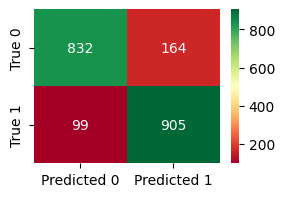

In [3]:
# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(value_train, label_train)

# Make predictions
label_pred = model.predict(value_test)

# Evaluate the model
accuracy = accuracy_score(label_test, label_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(label_test, label_pred))
matrix = (confusion_matrix(label_test, label_pred))
new_matrix = pd.DataFrame(matrix, index = ['True 0', 'True 1',], columns= ['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(3, 2))
sns.heatmap(new_matrix, annot=True, fmt="d", cmap="RdYlGn")
plt.show()


In [4]:
new_review = "I absolutely love this movie, was very at all"
review = vectorizer.transform([new_review]).toarray()
new_pred = model.predict(review)
print(new_pred)

[1]
